# EDA 

In [36]:
import os

import pandas as pd
from collections import Counter

# %matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

from sklearn import preprocessing
import tensorflow as tf
import tensorflow_probability as tfp

### Load data

In [37]:
DATA_DIR = '/home/daitran/Desktop/git/soil_properties/data'

In [38]:
ntb_data_path = os.path.join(DATA_DIR, 'NTB_black_data.csv')
tb_data_path = os.path.join(DATA_DIR, 'TB_blue_data.csv')

In [39]:
ntb_data= pd.read_csv(ntb_data_path)
tb_data = pd.read_csv(tb_data_path)

### Data pre-processing

In [40]:
ntb_data

,Name,X,Y,Elevation,Soi properties (main)
0,NTB-1,549723.89,213802.88,28.5,reclaimed layer
1,NTB-1,549723.89,213802.88,26.0,sedimentary layer
2,NTB-1,549723.89,213802.88,21.5,weathered soil
3,NTB-1,549723.89,213802.88,7.7,weathered rock
4,NTB-1,549723.89,213802.88,-0.3,soft rock
...,...,...,...,...,...
91,NTB-12,549564.60,213804.70,14.5,weathered rock
92,NTB-12,549564.60,213804.70,7.5,moderate rock
93,NTB-12,549564.60,213804.70,-10.5,hard rock
94,NTB-12,549564.60,213804.70,-13.5,moderate rock


In [41]:
tb_data

,Name,X,Y,Elevation,Soi properties (main)
0,TB-1,549699.0411,213765.3279,128.60,reclaimed layer
1,TB-1,549699.0411,213765.3279,126.60,sedimentary layer
2,TB-1,549699.0411,213765.3279,117.60,weathered soil
3,TB-1,549699.0411,213765.3279,108.10,weathered rock
4,TB-1,549699.0411,213765.3279,94.60,soft rock
...,...,...,...,...,...
111,TB-22,550622.5600,213730.7000,134.49,reclaimed layer
112,TB-22,550622.5600,213730.7000,114.19,weathered soil
113,TB-22,550622.5600,213730.7000,104.19,weathered rock
114,TB-22,550622.5600,213730.7000,93.69,soft rock


In [57]:
ntb_data.isnull().sum()

Name                     0
X                        0
Y                        0
Elevation                0
Soi properties (main)    0
Target                   0
dtype: int64

### Convert target

In [42]:
ntb_names = ntb_data['Soi properties (main)']
tb_names = tb_data['Soi properties (main)']

In [43]:
assign_num_list = {'topsoil layer': 0,
                      'weathered rock': 1,
                      'hard rock': 2,
                      'soft rock': 3,
                      'weathered soil': 4,
                      'colluvial layer': 5,
                      'moderate rock': 6,
                      'sedimentary layer': 7,
                      'reclaimed layer': 8}

In [44]:
ntb_target = ntb_names.replace(assign_num_list)
tb_target = tb_names.replace(assign_num_list)

In [45]:
ntb_data['Target'] = ntb_target
tb_data['Target'] = tb_target

In [46]:
ntb_data

,Name,X,Y,Elevation,Soi properties (main),Target
0,NTB-1,549723.89,213802.88,28.5,reclaimed layer,8
1,NTB-1,549723.89,213802.88,26.0,sedimentary layer,7
2,NTB-1,549723.89,213802.88,21.5,weathered soil,4
3,NTB-1,549723.89,213802.88,7.7,weathered rock,1
4,NTB-1,549723.89,213802.88,-0.3,soft rock,3
...,...,...,...,...,...,...
91,NTB-12,549564.60,213804.70,14.5,weathered rock,1
92,NTB-12,549564.60,213804.70,7.5,moderate rock,6
93,NTB-12,549564.60,213804.70,-10.5,hard rock,2
94,NTB-12,549564.60,213804.70,-13.5,moderate rock,6


In [47]:
tb_data

,Name,X,Y,Elevation,Soi properties (main),Target
0,TB-1,549699.0411,213765.3279,128.60,reclaimed layer,8
1,TB-1,549699.0411,213765.3279,126.60,sedimentary layer,7
2,TB-1,549699.0411,213765.3279,117.60,weathered soil,4
3,TB-1,549699.0411,213765.3279,108.10,weathered rock,1
4,TB-1,549699.0411,213765.3279,94.60,soft rock,3
...,...,...,...,...,...,...
111,TB-22,550622.5600,213730.7000,134.49,reclaimed layer,8
112,TB-22,550622.5600,213730.7000,114.19,weathered soil,4
113,TB-22,550622.5600,213730.7000,104.19,weathered rock,1
114,TB-22,550622.5600,213730.7000,93.69,soft rock,3


In [48]:
X_train_ntb = ntb_data[['X','Y','Elevation']].to_numpy()
y_train_ntb = ntb_data['Target'].to_numpy()

X_train_tb = tb_data[['X','Y','Elevation']].to_numpy()
y_train_tb = tb_data['Target'].to_numpy()

### Unbalanced dataset

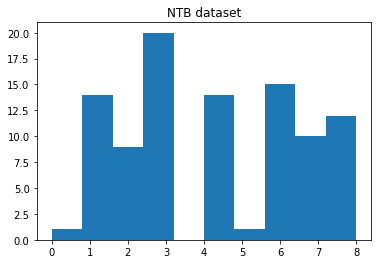

In [49]:
plt.hist(y_train_ntb)
plt.title('NTB dataset')
plt.show()

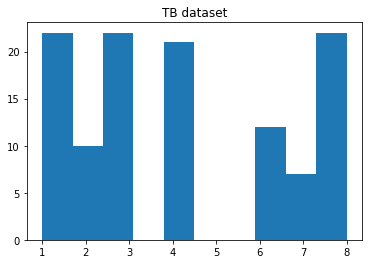

In [50]:
plt.hist(y_train_tb)
plt.title('TB dataset')
plt.show()

In [51]:
# https://scikit-learn.org/stable/modules/preprocessing.html
# Minmax scaler
# Standart Scaler
# 

normalizer = preprocessing.MinMaxScaler()

normalized_X_train_ntb = normalizer.fit_transform(X_train_ntb)
normalized_X_train_tb = normalizer.fit_transform(X_train_tb)
# normalized_train_X

In [52]:
labels = {}
for k, v in assign_num_list.items():
    labels[v] = k

In [53]:
label_colours = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'brown', 'pink']

### 3D Visualization

In [54]:
def plot_data(x, y, labels, colours):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(projection='3d')
    for c in np.unique(y):
        inx = np.where(y == c)
        ax.scatter(x[inx, 0], x[inx, 1], x[inx, 2], label=labels[c], c=colours[c])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Elevation')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
    

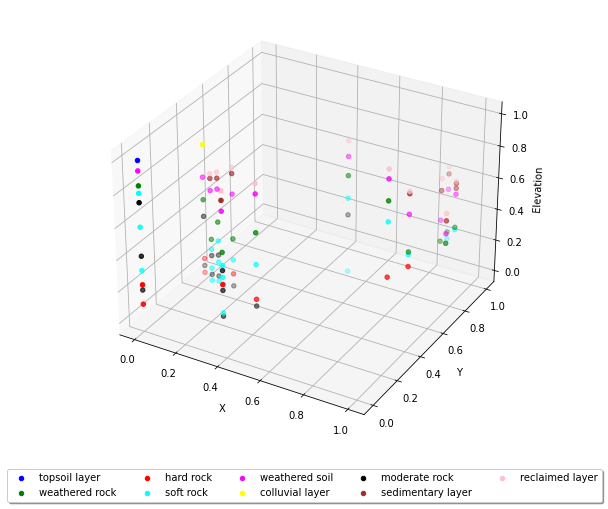

In [55]:
plot_data(normalized_X_train_ntb, y_train_ntb, labels, label_colours)
plt.show()

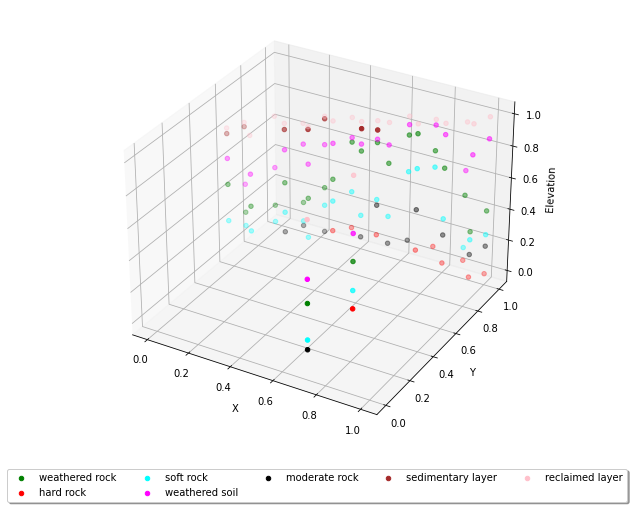

In [56]:
plot_data(normalized_X_train_tb, y_train_tb, labels, label_colours)
plt.show()